In [2]:
from matplotlib import pyplot as plt
from src.ml.data.data_loader import load_raw_data
from sklearn.cluster import KMeans

processed_data_path = '/Users/aya/Desktop/ML/insurance-recommender/data/processed/processed_user_data.csv'
processed_user_data = load_raw_data(processed_data_path)
processed_user_data

,_id,PCA1,PCA2,PCA3
0,65a713cc1dfebcf6ca173f0d,-2.003951,0.837818,0.418612
1,65a714291dfebcf6ca173f0e,-0.947833,-1.410973,-1.196869
2,65a714641dfebcf6ca173f0f,-1.814342,-0.072063,1.476559
3,65a71c7f1dfebcf6ca173f11,4.289241,0.801391,2.966492
4,65a71f2e1dfebcf6ca173f12,1.403473,-2.382741,0.245195
...,...,...,...,...
56,65a9c22902478feb98fc38ff,-1.315299,0.742847,0.181369
57,65a9c22d02478feb98fc3900,-1.410236,0.560812,0.086851
58,65a9c23902478feb98fc3901,-1.410236,0.560812,0.086851
59,65a9c24302478feb98fc3902,-1.911554,0.832506,-0.074323


/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.loca

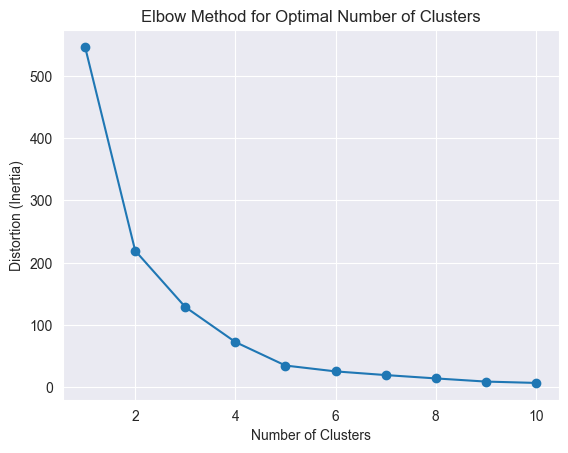

In [3]:
features_for_clustering = processed_user_data[['PCA1', 'PCA2', 'PCA3']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)
    
# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aya/.local/share/virtualenvs/insurance-recommender-AUj_LIzY/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


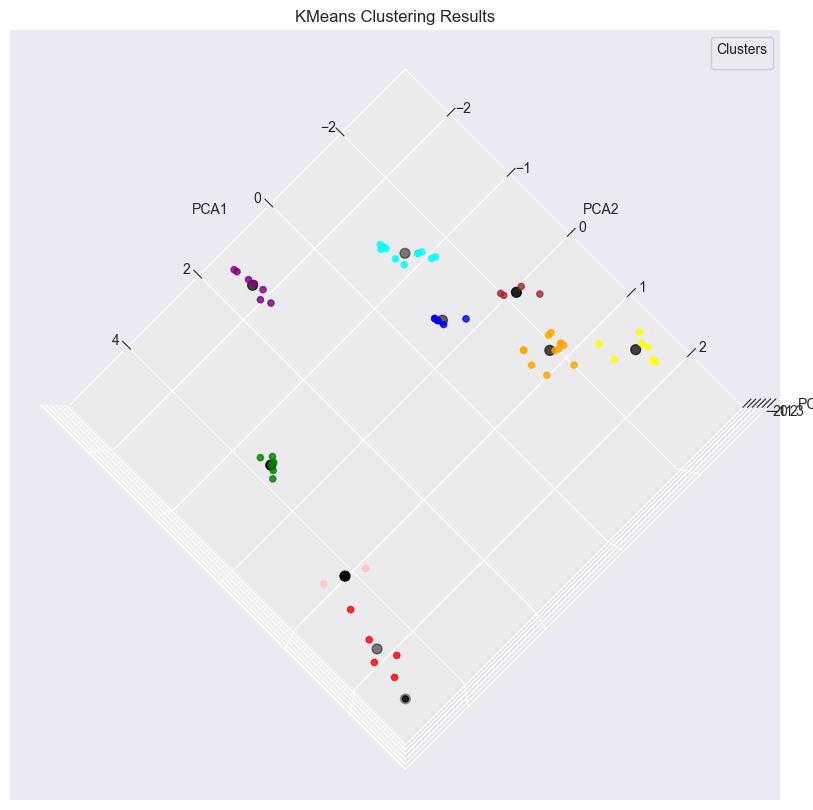

In [15]:

# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 10  # Choose the point where the distortion starts to decrease more slowly (the "elbow")

# Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
processed_user_data['cluster'] = kmeans.fit_predict(features_for_clustering)
centroids = kmeans.cluster_centers_


# Visualize the clustering results with a 3D scatter plot
cluster_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown', 'pink','yellow','black']

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='.', s=200, c='black', label='Centroids')

scatter = ax.scatter(processed_user_data['PCA1'], processed_user_data['PCA2'], processed_user_data['PCA3'], c=[cluster_colors[i] for i in processed_user_data['cluster']], alpha=0.8)
ax.set_title('KMeans Clustering Results')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

ax.view_init(elev=90, azim=45) 